## Reading Files with Open

In this section, we will us Python's built in open function to create a file object and obtain the data from a .txt file. 

We can open the file example.txt as follows:

In [3]:
file1 = open(r'data\example.txt','r')

We can now use the file object to obtain information about the file.
- We can use the data attribute name to get the name of the file:

In [4]:
file1.name

'data\\example.txt'

We can see what mode the object is in using the data attribute mode:

In [5]:
file1.mode

'r'

You chould always close the file object using the method close

In [6]:
file1.close()

We can use a with statement to avoid needing to manually close the file

In [7]:
with open(r'data\example.txt','r') as file1:
    file_stuff = file1.read()
    print(file_stuff)

print(file1.closed) # Will return True if the file is closed
print(file_stuff)

This is example.txt
This is line 2
This is line 3
True
This is example.txt
This is line 2
This is line 3


The with statement will run everything within the indent block and then automatically closes the file.

We can output every line as an element in a list using the method readlines()

In [8]:
with open(r'data\example.txt','r') as file1:
    file_stuff = file1.readlines()
    print(file_stuff)

['This is example.txt\n', 'This is line 2\n', 'This is line 3']


We can use the method readline() to read the first line in the file. 

In [9]:
with open(r'data\example.txt','r') as file1:
    file_stuff = file1.readline()
    print(file_stuff)

This is example.txt



The first time it is called, it will save the first line in the variable 'file_stuff'. The sceond time it's called, it will save the second line, etc.

We can specify the number of characters we would like to read from the string as an argument to the method 'readline' or 'read'. readline can only read one line at most, however read will read the entire file.

In [10]:
with open(r'data\example.txt','r') as file1:
    file_stuff = file1.readline(2)
    print(file_stuff)
    file_stuff = file1.readline(16)
    print(file_stuff)

Th
is is example.tx


### Writing Files with open
We can use Python's open function to get a file object to create a text file. we can apply the method write to write data to that file.

We can create the file example2.txt as follows:

In [11]:
file1 = open(r'data\example2.txt','w')
file1.close()

When using the 'w' mode, if the file already exist in the directory, it will be overwritten. Otherwise it will be created. As before, we can use the with statement:

In [12]:
with open(r'data\example2.txt','w') as file1:
    file1.write('This is line A\n')
    file1.write('This is line B\n')

This will create a file example2.txt and write the above lines to the file. Each time the write function is called, it will write to the file.

We can set the mode to append using 'a'. This will not create a new file but just use the existing one. If we call the method write, it will just write to the existing file.

In [13]:
with open(r'data\example2.txt','a') as file1:
    file1.write('This is line C\n')

We can copy one file to another as follows:

In [15]:
with open(r'data\example2.txt','r') as readfile:
    with open(r'data\example2copy.txt','w') as writefile:
        for line in readfile:
            writefile.write(line)

- First, we read the file example2.txt and interact with it via the file object, read file. 
- Then, we create a new file and use the file object write file to interact with it
- The for loop takes a line from the readfile and stores it in our new file.
- This process is repeated until the end of the file is reached, at which point both files are closed.

### Loading data with Pandas

In [16]:
import pandas as pd

One way pandas allows you to work with data is with a dataframe.

For this example, we will create a DataFrame out of a dictionary:

In [17]:
songs = {
    'Artist':['Michael Jackson','AC/DC','Pink Floyd','Whitney Houston','Meat Loaf','Eagles','Bee Gees','Fleetwood Mac'],
    'Album':['Thriller','Back in Black','The Dark Side of the Moon','The Bodyguard','Bat Out of Hell','Their Greatest Hits','Saturday Night Fever','Rumours'],
    'Released':[1982,1980,1973,1992,1977,1976,1977,1977],
    'Length':['00:42:19','00:42:11','00:42:49','00:57:44','00:46:33','00:43:08','01:15:54','00:40:01'],
    'Genre':['pop, rock, R&B','hard rock','progressive rock','R&B, soul, pop','hard rock, progressive rock','rock, soft rock, folk rock','disco','soft rocl'],
    'Music Recording Sales (millions)':[46.0,26.1,24.2,27.4,20.6,32.2,20.6,27.9],
    'Claimed Sales (millions)':[65,50,45,44,43,42,40,40],
    'Released.1':['30-Nov-82','25-Jul-80','01-Mar-73','17-Nov-92','21-Oct-77','17-Feb-76','15-Nov-77','04-Feb-77'],
    'Soundtrack':['NaN','NaN','NaN','Y','NaN','NaN','Y','NaN'],
    'Rating':[10.0,9.5,9.0,8.5,8.0,7.5,7.0,6.5]
}
songs_frame = pd.DataFrame(songs)
songs_frame.to_csv(r'data\songs.csv')
songs_frame.head()

,Artist,Album,Released,Length,Genre,Music Recording Sales (millions),Claimed Sales (millions),Released.1,Soundtrack,Rating
0,Michael Jackson,Thriller,1982,00:42:19,"pop, rock, R&B",46.0,65,30-Nov-82,NaN,10.0
1,AC/DC,Back in Black,1980,00:42:11,hard rock,26.1,50,25-Jul-80,NaN,9.5
2,Pink Floyd,The Dark Side of the Moon,1973,00:42:49,progressive rock,24.2,45,01-Mar-73,NaN,9.0
3,Whitney Houston,The Bodyguard,1992,00:57:44,"R&B, soul, pop",27.4,44,17-Nov-92,Y,8.5
4,Meat Loaf,Bat Out of Hell,1977,00:46:33,"hard rock, progressive rock",20.6,43,21-Oct-77,NaN,8.0


The keys in the dictionary correspond to the table headers and the values are lists corresponding to the rows.

#### Working with data in Pandas
- unique() - determines the unique elements in the column of a DataFrame

In [18]:
songs_frame['Released'].unique()

array([1982, 1980, 1973, 1992, 1977, 1976], dtype=int64)

Let's say we want to create a new database consisting of songs made after 1979:

In [19]:
df1 = songs_frame[songs_frame['Released']>=1980]
df1.to_csv(r'data\songs_after_1980.csv')
df1.head()

,Artist,Album,Released,Length,Genre,Music Recording Sales (millions),Claimed Sales (millions),Released.1,Soundtrack,Rating
0,Michael Jackson,Thriller,1982,00:42:19,"pop, rock, R&B",46.0,65,30-Nov-82,NaN,10.0
1,AC/DC,Back in Black,1980,00:42:11,hard rock,26.1,50,25-Jul-80,NaN,9.5
3,Whitney Houston,The Bodyguard,1992,00:57:44,"R&B, soul, pop",27.4,44,17-Nov-92,Y,8.5


### One Dimensional NumPy
NumPy is a library for scientific comupting.

A numpy array or ND array is similar to a list. It is usually fixed in size and each element is of the same type.

We can cast a list to a numpy array by forst importing numpy

In [ ]:
import numpy as np
a = np.array([0,1,2,3,4])
a

array([0, 1, 2, 3, 4])

We can access each element in the array with an index, similar to a list.

Here are some basic array attributes:

In [ ]:
a.size  # The attribute size is the number of elements in an array


5

In [ ]:
a.ndim  # The number of array dimensions or the rank of the array, in this case 1

1

In [ ]:
a.shape # A tuple of integers indication the size of the array in each dimension

(5,)

We can also create a numpy array using real numbers.

In [ ]:
b = np.array([3.1,11.02,6.2,213.2,5.2])
type(b)

numpy.ndarray

In [ ]:
b.dtype

dtype('float64')

##### Indexing and slicing

In [ ]:
c = np.array([20,1,2,3,4])
c

array([20,  1,  2,  3,  4])

We can change the first element in the array to 100 as follows:

In [ ]:
c[0] = 100
c

array([100,   1,   2,   3,   4])

Like with lists and tuples, we can slice a numpy array:

In [ ]:
d = c[1:4]
d

array([1, 2, 3])

##### Basic Operations
- Vector addition and subtraction

In [ ]:
u = np.array([1,0])
v = np.array([0,1])
z = u+v
z

array([1, 1])

- Array multiplication with a scalar

In [ ]:
2*u

array([2, 0])

- Product of two numpy arrays


In [ ]:
u = np.array([1,2])
v= np.array([3,2])
u*v

array([3, 4])

- Dot product

In [ ]:
np.dot(u,v)

7

- Adding a constant to a numpy array

In [ ]:
u = np.array([1,2,3,-1])
u + 1

array([2, 3, 4, 0])

##### Universal Functions
- <code>.mean()</code> - Calculates the mean or average value of all the elements in the array
- <code>.max()</code> - Find the max value within the array
- <code>.min()</code> - Find the minimum value of the array
- <code>.linspace()</code> - Returns evenly spaced numbers over specified interval
- <code>.std()</code> - Returns standard deviation of an array

In [ ]:
np.linspace(-2,2,num=5) # The parameter num indicates the number of samples to generate.

array([-2., -1.,  0.,  1.,  2.])

We can use <code>linspace()</code>

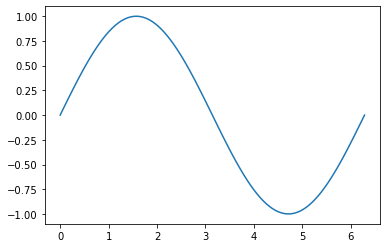

In [ ]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y)

### Two Dimensional Numpy
Consider the following list:

In [ ]:
a = [[11,12,13],[21,22,23],[31,32,33]]

The list contains three nested lists each of equal size. We can cast the list to a numpy array as follows:

In [ ]:
A = np.array(a)
A

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

Each nested list corresponds to a different row of the matrix.

We can can us the attribute <code>ndim</code> to obtain the number of axes or dimensions referred to as rank

In [ ]:
A.ndim

2

<code>ndim</code> can be thought of as the number of nested lists.

The attribute <code>shape</code> returns a tuple. The first element in the tuple corresponds to the number of nested lists contained in the original list. The second element corresponds to the size of each of the nexted list.

In [ ]:
A.shape

(3, 3)

We can also add matrices

In [ ]:
x = np.array([[1,0],[0,1]])
y = np.array([[2,1],[1,2]])
x+y

array([[3, 1],
       [1, 3]])

And multiply by scalars:

In [ ]:
2 * y

array([[4, 2],
       [2, 4]])

(Hadamard product)

In [ ]:
x*y

array([[2, 0],
       [0, 2]])

Matrix multiplication:

In [ ]:
a = np.array([[0,1,1],[1,0,1]])
b = np.array([[1,1],[1,1],[-1,1]])

np.dot(a,b)

array([[0, 2],
       [0, 2]])